   # MLP
       1.感知模型 - 2.訓練模型 - 3.評估模型準確率 - 4.訓練完成模型 - 5.辨識MNIST手寫數字
       
       第一步：資料預處理
       第二步：建立模型
       第三步：訓練模型
       第四步：評估模型準確率
       第五步：進行預測

# 第一步：進行資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

C:\Users\leobo\Anaconda3\envs\tensorflow-gpu\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
from keras.datasets import mnist
(x_train_image,y_train_label),(x_test_image,y_test_label)=mnist.load_data()

In [5]:
x_Train = x_train_image.reshape(60000,784).astype('float32')
x_Test  = x_test_image.reshape(10000,784).astype('float32')

In [7]:
x_Train_normalize = x_Train / 255
x_Test_normalize  = x_Test  / 255

In [9]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot  = np_utils.to_categorical(y_test_label)

# 第二步：建立模型

In [24]:
#匯入所需模組

from keras.models import Sequential
from keras.layers import Dense

In [25]:
#建立Sequential模型

model = Sequential()

model.add(Dense(units=256,input_dim=784,kernel_initializer='normal',activation='relu'))

In [26]:
#建立 輸出層

model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))

In [27]:
# 查看模型摘要

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


# 進行訓練

In [28]:
#定義訓練方式

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [31]:
#開始訓練

train_history = model.fit(x=x_Train_normalize,y=y_Train_OneHot,validation_split=0.2,epochs=10,batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 1s - loss: 0.0264 - acc: 0.9935 - val_loss: 0.0826 - val_acc: 0.9752
Epoch 2/10
 - 1s - loss: 0.0222 - acc: 0.9948 - val_loss: 0.0818 - val_acc: 0.9750
Epoch 3/10
 - 2s - loss: 0.0186 - acc: 0.9958 - val_loss: 0.0782 - val_acc: 0.9769
Epoch 4/10
 - 1s - loss: 0.0153 - acc: 0.9972 - val_loss: 0.0810 - val_acc: 0.9761
Epoch 5/10
 - 1s - loss: 0.0132 - acc: 0.9974 - val_loss: 0.0803 - val_acc: 0.9770
Epoch 6/10
 - 1s - loss: 0.0108 - acc: 0.9984 - val_loss: 0.0776 - val_acc: 0.9778
Epoch 7/10
 - 1s - loss: 0.0089 - acc: 0.9989 - val_loss: 0.0801 - val_acc: 0.9768
Epoch 8/10
 - 1s - loss: 0.0078 - acc: 0.9991 - val_loss: 0.0807 - val_acc: 0.9770
Epoch 9/10
 - 1s - loss: 0.0064 - acc: 0.9992 - val_loss: 0.0806 - val_acc: 0.9774
Epoch 10/10
 - 1s - loss: 0.0053 - acc: 0.9996 - val_loss: 0.0835 - val_acc: 0.9769


In [35]:
# 建立show_train_history 顯示訓練過程
%matplotlib inline
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()



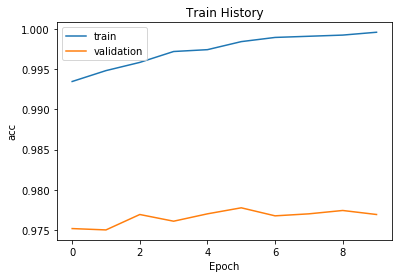

In [43]:
show_train_history(train_history,'acc','val_acc')